Aula 2 - PRÁTICA - Thais Damasceno 11721BCC007

1) Carregue o dataset Iris.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Carregar o dataset
iris = load_iris()

# DataFrame para melhor visualização
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


2) Aplique os classificadores Árvore de Decisão e KNN. Compare os resultados.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Separar os dados em treino e teste (80% treino, 20% teste) com mais de 65% de treino a acurácia de ambos passou a ser a mesma
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Criar e treinar a Árvore de Decisão
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Criar e treinar o KNN (k=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Fazer previsões
y_pred_tree = tree_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)

# Avaliar a acurácia
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_knn = accuracy_score(y_test, y_pred_knn)

# Mostrar resultados
print(f'Acurácia da Árvore de Decisão: {acc_tree:.2f}')
print(f'Acurácia do KNN: {acc_knn:.2f}')


Acurácia da Árvore de Decisão: 1.00
Acurácia do KNN: 1.00


3) Repita o passo 2, mas agora antes normalize os dados

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Criar e treinar a Árvore de Decisão
tree_clf_norm = DecisionTreeClassifier(random_state=42)
tree_clf_norm.fit(X_train_norm, y_train)

# Criar e treinar o KNN (k=5)
knn_clf_norm = KNeighborsClassifier(n_neighbors=5)
knn_clf_norm.fit(X_train_norm, y_train)

# Fazer previsões
y_pred_tree_norm = tree_clf_norm.predict(X_test_norm)
y_pred_knn_norm = knn_clf_norm.predict(X_test_norm)

# Avaliar a acurácia
acc_tree_norm = accuracy_score(y_test, y_pred_tree_norm)
acc_knn_norm = accuracy_score(y_test, y_pred_knn_norm)

# Comparação de acurácia antes e depois da normalização
print(f"Acurácia da Árvore de Decisão (sem normalização): {acc_tree:.2f}")
print(f"Acurácia da Árvore de Decisão (com normalização): {acc_tree_norm:.2f}\n")
print(f"Acurácia do KNN (sem normalização): {acc_knn:.2f}")
print(f"Acurácia do KNN (com normalização): {acc_knn_norm:.2f}")


Acurácia da Árvore de Decisão (sem normalização): 1.00
Acurácia da Árvore de Decisão (com normalização): 1.00

Acurácia do KNN (sem normalização): 1.00
Acurácia do KNN (com normalização): 1.00


4) Repita o passo 2, mas agora antes padronize (standardize) os dados

In [4]:
from sklearn.preprocessing import StandardScaler

# Padronizar os dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Criar e treinar a Árvore de Decisão
tree_clf_std = DecisionTreeClassifier(random_state=42)
tree_clf_std.fit(X_train_std, y_train)

# Criar e treinar o KNN (k=5)
knn_clf_std = KNeighborsClassifier(n_neighbors=5)
knn_clf_std.fit(X_train_std, y_train)

# Fazer previsões
y_pred_tree_std = tree_clf_std.predict(X_test_std)
y_pred_knn_std = knn_clf_std.predict(X_test_std)

# Avaliar a acurácia
acc_tree_std = accuracy_score(y_test, y_pred_tree_std)
acc_knn_std = accuracy_score(y_test, y_pred_knn_std)

# Comparação de acurácia antes e depois da padronização
print(f"Acurácia da Árvore de Decisão (sem padronização): {acc_tree:.2f}")
print(f"Acurácia da Árvore de Decisão (com padronização): {acc_tree_std:.2f}\n")
print(f"Acurácia do KNN (sem padronização): {acc_knn:.2f}")
print(f"Acurácia do KNN (com padronização): {acc_knn_std:.2f}")


Acurácia da Árvore de Decisão (sem padronização): 1.00
Acurácia da Árvore de Decisão (com padronização): 1.00

Acurácia do KNN (sem padronização): 1.00
Acurácia do KNN (com padronização): 1.00


5) Plote um gráfico com os resultados do KNN para diferentes valores de k.

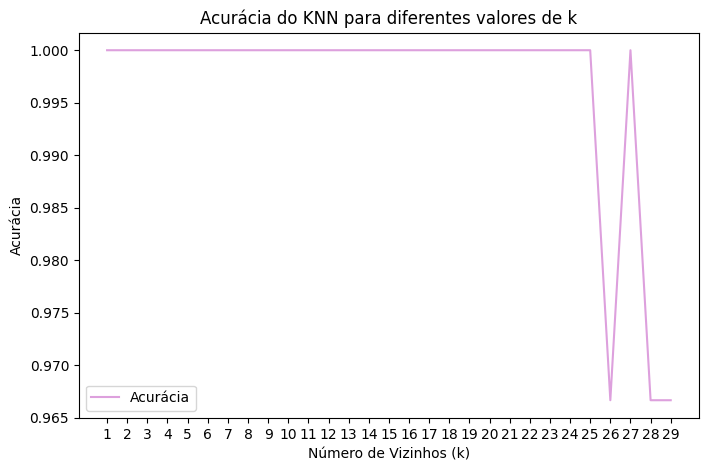

In [5]:
from matplotlib import pyplot as plt

# Testando diferentes valores de k no KNN após padronização
k_values = range(1, 30)
acc_knn_std_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    y_pred_k = knn.predict(X_test_std)
    acc_knn_std_list.append(accuracy_score(y_test, y_pred_k))



# Plotando a acurácia para diferentes valores de k
plt.figure(figsize=(8,5))
plt.plot(k_values, acc_knn_std_list, linestyle='-', color='plum', label="Acurácia")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.title("Acurácia do KNN para diferentes valores de k")
plt.xticks(k_values)
plt.legend()
plt.show()


6) Plote um gráfico com os resultados da Árvore de Decisão para diversos valores de max_leaf_nodes, e mostre algumas árvores de decisão diferentes geradas

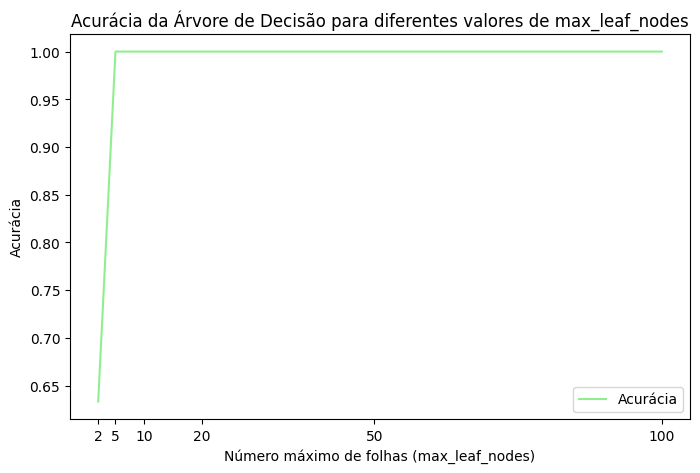

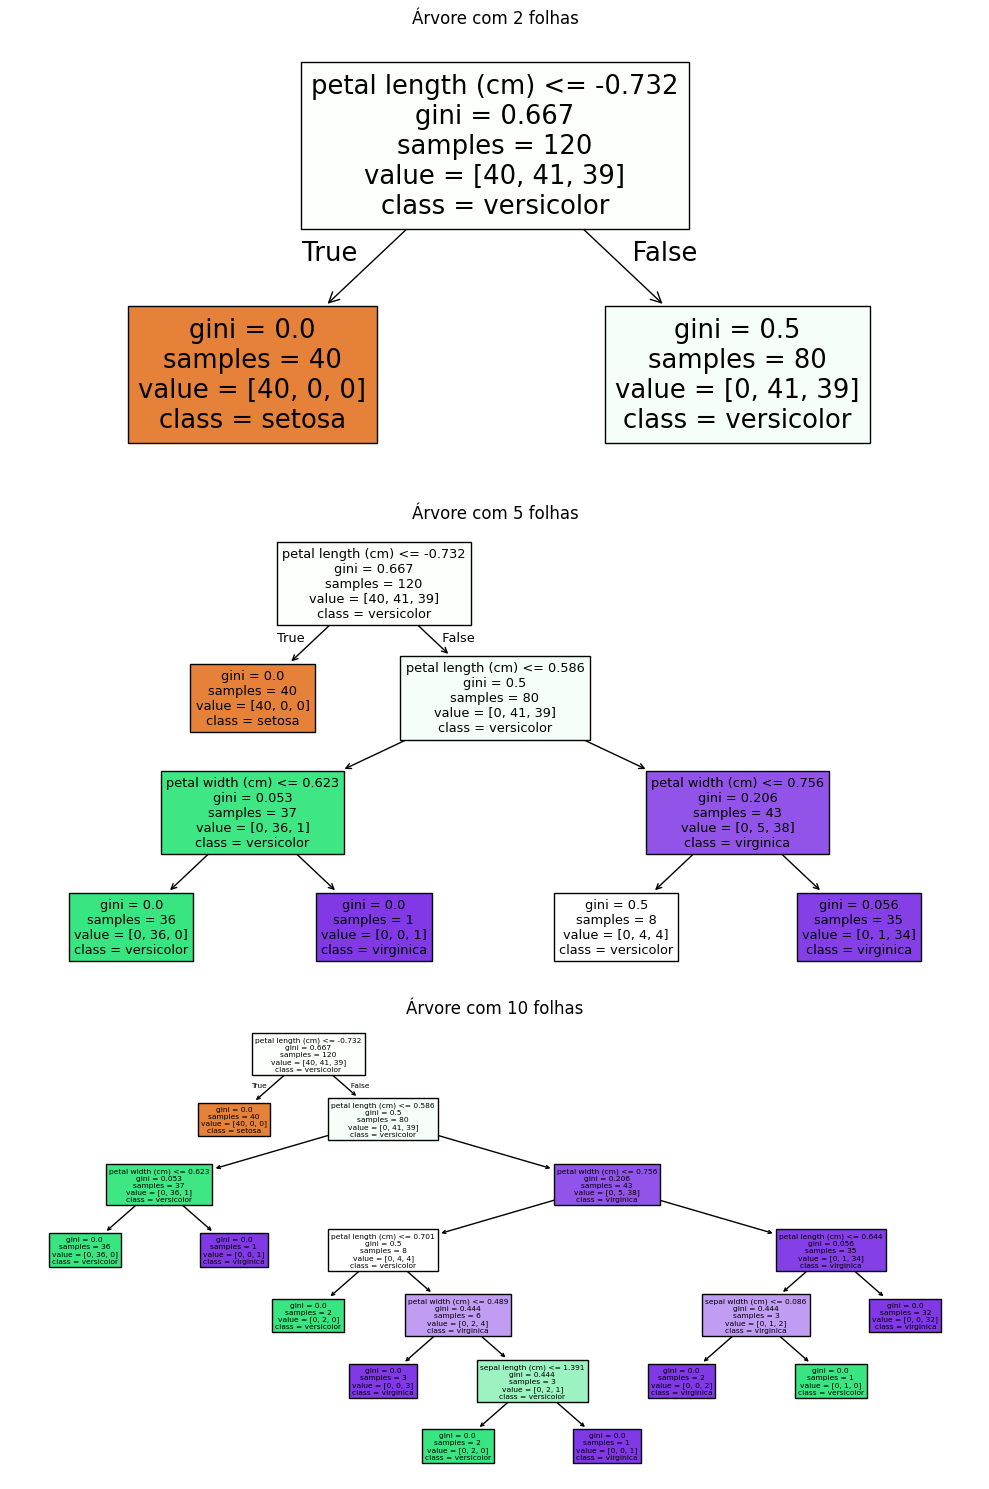

In [6]:
from sklearn.tree import plot_tree

# Testando diferentes valores de max_leaf_nodes
leaf_values = [2, 5, 10, 20, 50, 100]
acc_tree_list = []

for leaf in leaf_values:
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    tree_clf.fit(X_train_std, y_train)
    y_pred_tree = tree_clf.predict(X_test_std)
    acc_tree_list.append(accuracy_score(y_test, y_pred_tree))

# Plotando a acurácia para diferentes valores de max_leaf_nodes
plt.figure(figsize=(8,5))
plt.plot(leaf_values, acc_tree_list, linestyle='-', color='lightgreen', label="Acurácia")
plt.xlabel("Número máximo de folhas (max_leaf_nodes)")
plt.ylabel("Acurácia")
plt.title("Acurácia da Árvore de Decisão para diferentes valores de max_leaf_nodes")
plt.xticks(leaf_values)
plt.legend()
plt.show()
print("\n")

# Exibir algumas árvores geradas
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plotar árvores com 2, 10 e 50 folhas para comparação
for i, leaf in enumerate([2, 5, 10]):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    tree_clf.fit(X_train_std, y_train)
    plot_tree(tree_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, ax=axes[i])
    axes[i].set_title(f"Árvore com {leaf} folhas")

plt.tight_layout()
plt.show()

7) Carregue o dataset de Qualidade de Vinhos (arquivo .CSV aqui: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [7]:
import pandas as pd

# URL do dataset de vinhos tintos
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Carregar os dados
df = pd.read_csv(url, sep=";")

# Exibir as primeiras linhas do dataset
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

8) Repita os passos 2 a 6 usando a base de vinhos

Acurácia da Árvore de Decisão (sem normalizar): 0.61
Acurácia do KNN (sem normalizar): 0.48

Acurácia da Árvore de Decisão (com MinMaxScaler): 0.61
Acurácia do KNN (com MinMaxScaler): 0.59

Acurácia da Árvore de Decisão (com StandardScaler): 0.61
Acurácia do KNN (com StandardScaler): 0.61


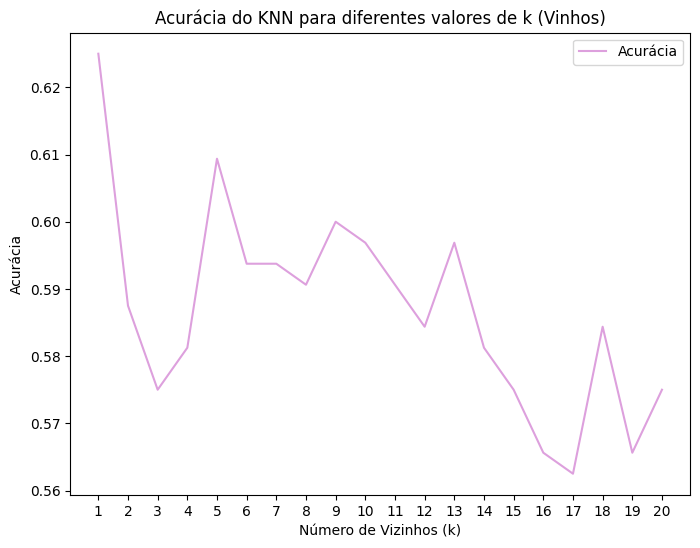

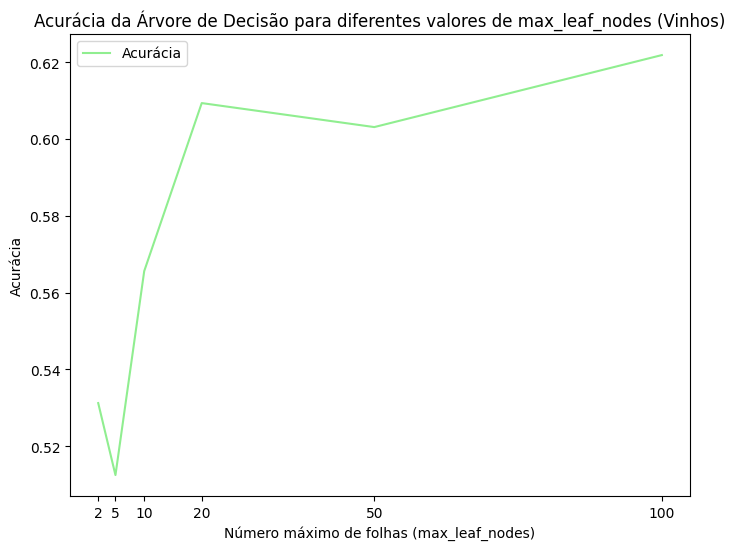

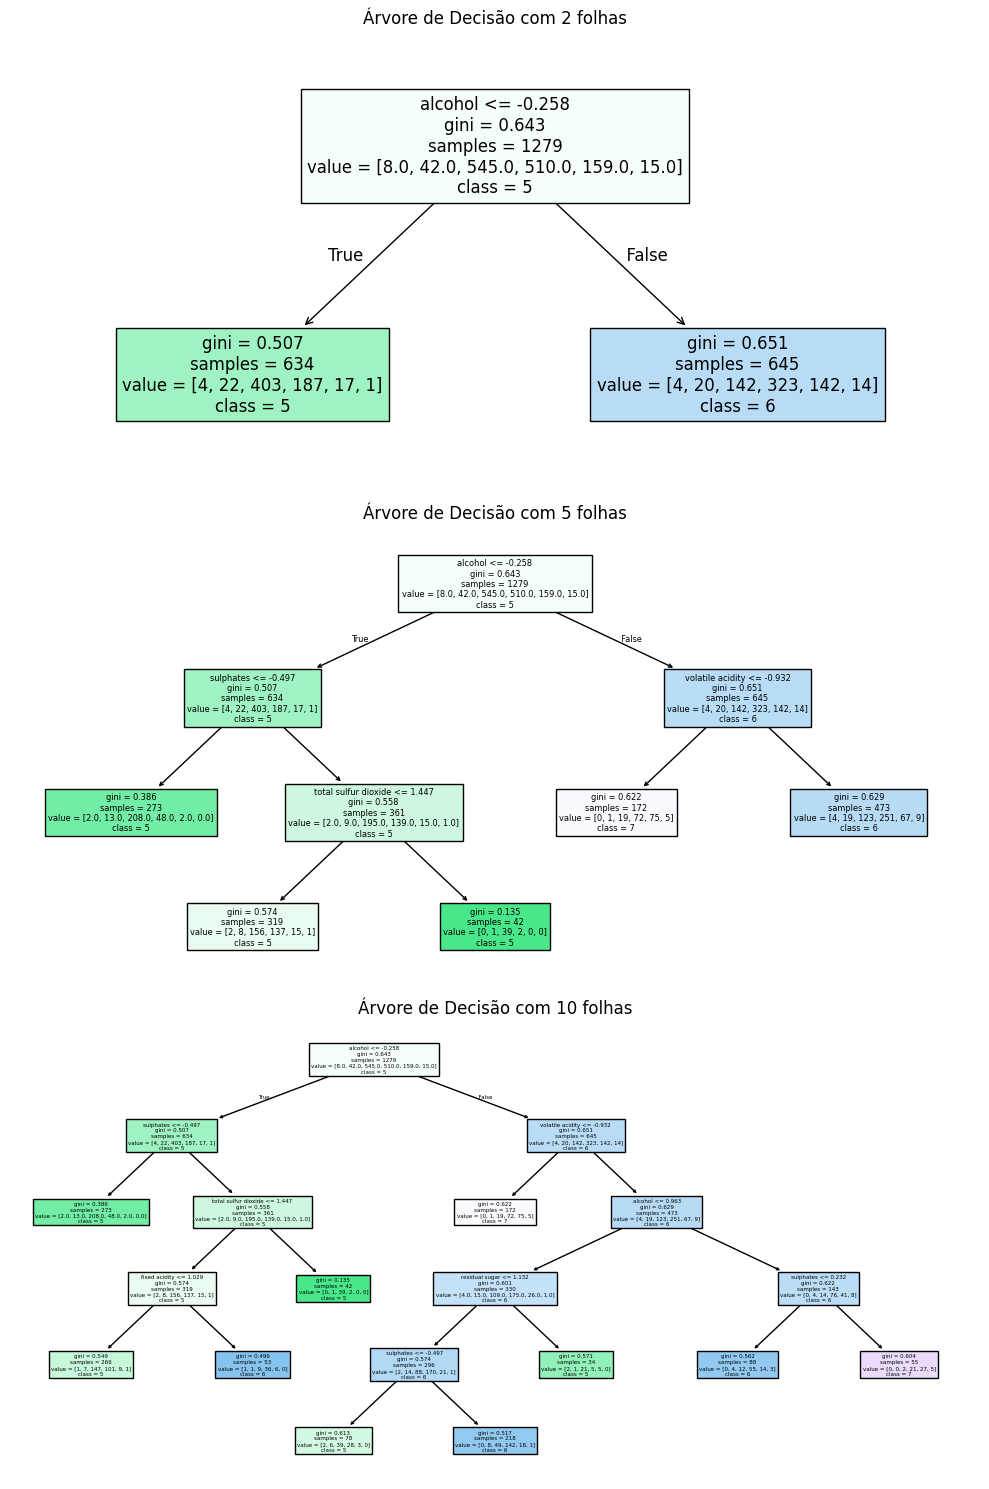

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


# Passo 2
# Definir X (atributos) e y (alvo)
X = df.drop(columns=["quality"])  # Todas as colunas exceto 'quality'
y = df["quality"]  # Classe alvo

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Criar e treinar a Árvore de Decisão
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Criar e treinar o KNN (k=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Fazer previsões
y_pred_tree = tree_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)

# Avaliar a acurácia
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"Acurácia da Árvore de Decisão (sem normalizar): {acc_tree:.2f}")
print(f"Acurácia do KNN (sem normalizar): {acc_knn:.2f}\n")



# Passo 3
# Normalizar os dados
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Treinar e testar os classificadores
tree_clf_norm = DecisionTreeClassifier(random_state=42)
tree_clf_norm.fit(X_train_norm, y_train)

knn_clf_norm = KNeighborsClassifier(n_neighbors=5)
knn_clf_norm.fit(X_train_norm, y_train)

# Fazer previsões
y_pred_tree_norm = tree_clf_norm.predict(X_test_norm)
y_pred_knn_norm = knn_clf_norm.predict(X_test_norm)

# Avaliar a acurácia
acc_tree_norm = accuracy_score(y_test, y_pred_tree_norm)
acc_knn_norm = accuracy_score(y_test, y_pred_knn_norm)

print(f"Acurácia da Árvore de Decisão (com MinMaxScaler): {acc_tree_norm:.2f}")
print(f"Acurácia do KNN (com MinMaxScaler): {acc_knn_norm:.2f}\n")



# Passo 4
# Padronizar os dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Treinar e testar os classificadores
tree_clf_std = DecisionTreeClassifier(random_state=42)
tree_clf_std.fit(X_train_std, y_train)

knn_clf_std = KNeighborsClassifier(n_neighbors=5)
knn_clf_std.fit(X_train_std, y_train)

# Fazer previsões
y_pred_tree_std = tree_clf_std.predict(X_test_std)
y_pred_knn_std = knn_clf_std.predict(X_test_std)

# Avaliar a acurácia
acc_tree_std = accuracy_score(y_test, y_pred_tree_std)
acc_knn_std = accuracy_score(y_test, y_pred_knn_std)

print(f"Acurácia da Árvore de Decisão (com StandardScaler): {acc_tree_std:.2f}")
print(f"Acurácia do KNN (com StandardScaler): {acc_knn_std:.2f}")



# Passo 5
k_values = range(1, 21)
acc_knn_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    y_pred_k = knn.predict(X_test_std)
    acc_knn_list.append(accuracy_score(y_test, y_pred_k))

# Plotando a acurácia para diferentes valores de k
plt.figure(figsize=(8,6))
plt.plot(k_values, acc_knn_list, linestyle='-', color='plum', label="Acurácia")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.title("Acurácia do KNN para diferentes valores de k (Vinhos)")
plt.xticks(k_values)
plt.legend()
plt.show()



# Passo 6
leaf_values = [2, 5, 10, 20, 50, 100]
acc_tree_list = []

for leaf in leaf_values:
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    tree_clf.fit(X_train_std, y_train)
    y_pred_tree = tree_clf.predict(X_test_std)
    acc_tree_list.append(accuracy_score(y_test, y_pred_tree))

# Plotando a acurácia para diferentes valores de max_leaf_nodes
plt.figure(figsize=(8,6))
plt.plot(leaf_values, acc_tree_list, linestyle='-', color='lightgreen', label="Acurácia")
plt.xlabel("Número máximo de folhas (max_leaf_nodes)")
plt.ylabel("Acurácia")
plt.title("Acurácia da Árvore de Decisão para diferentes valores de max_leaf_nodes (Vinhos)")
plt.xticks(leaf_values)
plt.legend()
plt.show()

# Mostrar algumas árvores geradas
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, leaf in enumerate([2, 5, 10]):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    tree_clf.fit(X_train_std, y_train)

    plot_tree(tree_clf, feature_names=df.columns[:-1], class_names=[str(c) for c in sorted(df["quality"].unique())],
              filled=True, ax=axes[i])


    axes[i].set_title(f"Árvore de Decisão com {leaf} folhas")

plt.tight_layout()
plt.show()

Dataset

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,712 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,338 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

In [ ]:
from pyspark.ml.fpm import PrefixSpan
from pyspark.shell import sc
from pyspark.sql.functions import desc
from pyspark.sql.types import Row
from google.colab import drive

from csv import reader

# open file in read mode
list = []

# Necessario primeira vez
drive.mount('/content/drive')

with open('/content/drive/MyDrive/Credit.csv', newline='') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    customerlist=[]
    sequence = []
    anotherList=[]
    for row in csv_reader:# row variable is a list that represents a row in csv  # print(row)

        list2 = []

        for x in row:

              if x.isdigit():
                #print("before")
                #print(x)
                if  len(customerlist) == 0 or  customerlist[len(customerlist) - 1] != x:

                     if len(customerlist) != 0:
                            list.append(Row(sequence=anotherList))

                     customerlist.append(x)
                     sequence=[]
                     anotherList=[]

              if x != "" and not x.isdigit() :

                  list2.append(x)

        anotherList.append(list2)
list.append(Row(sequence=anotherList))
print(list)



df = sc.parallelize(list).toDF()

prefixSpan = PrefixSpan(minSupport=0.1, maxPatternLength=3,
                        maxLocalProjDBSize=32000000)

# Find frequent sequential patterns.
prefixSpan.findFrequentSequentialPatterns(df).sort(desc("freq")).show(100,False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[['14.891', ' Male', 'No', 'Yes', 'Caucasian']]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[['106.025', 'Female', 'Yes', 'Yes', 'Asian']]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[['104.593', ' Male', 'No', 'No', 'Asian']]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[['148.924', 'Female', 'No', 'No', 'Asian']]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[]), Row(sequence=[['55.882', ' Male', 'No', 'Yes', 'Caucasian']]), Row(sequence=[]), Row(s

9) Repita os passos 2 a 6 usando a base Credit Card Balance Data dos links abaixo para criar um classificador de pessoas que ganham mais de 50k ou menos de 50k.

Atenção: Você deve escolher uma estratégia para lidar com atributos não-numéricos. Justifique sua escolha!

Dica: você deve criar esse target a partir da coluna "Income". Lembre de não usar a coluna "Income" no seu cálculo.

Descrição do dataset: https://rdrr.io/cran/ISLR/man/Credit.html


Mounted at /content/drive
   Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   

  Married  Ethnicity  Balance  
0     Yes  Caucasian      333  
1     Yes      Asian      903  
2      No      Asian      580  
3      No      Asian      964  
4     Yes  Caucasian      331  


Resultados sem normalização/padronização:
Acurácia KNN: 0.9167
Acurácia Árvore de Decisão: 0.9000

Resultados com Normalização:
Acurácia KNN: 0.7583
Acurácia Árvore de Decisão: 0.9000

Resultados com Padronização:
Acurácia KNN: 0.7833
Acurácia Árvore de Decisão: 0.8917


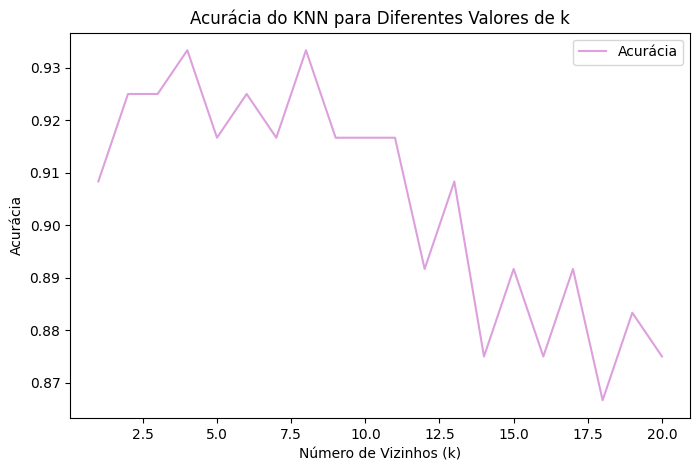

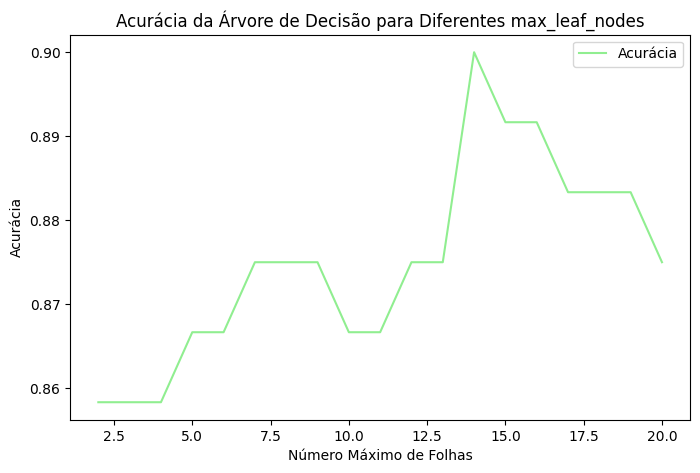

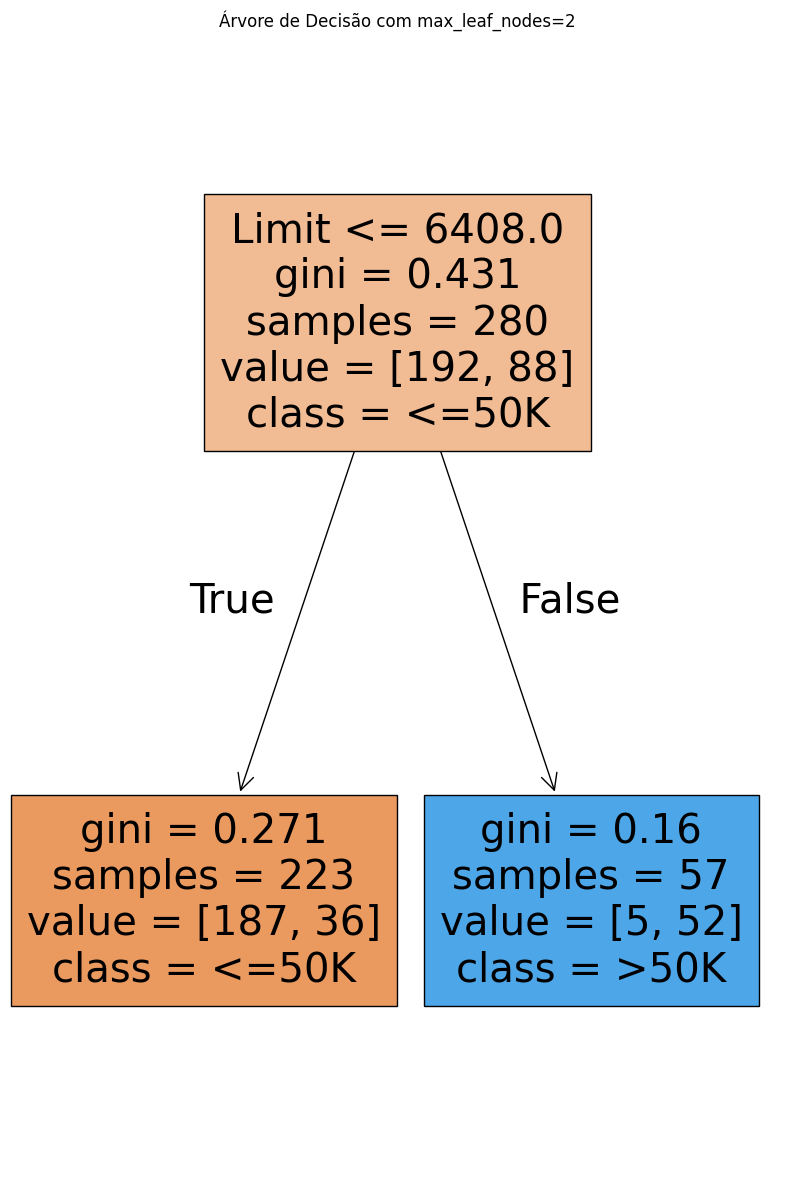

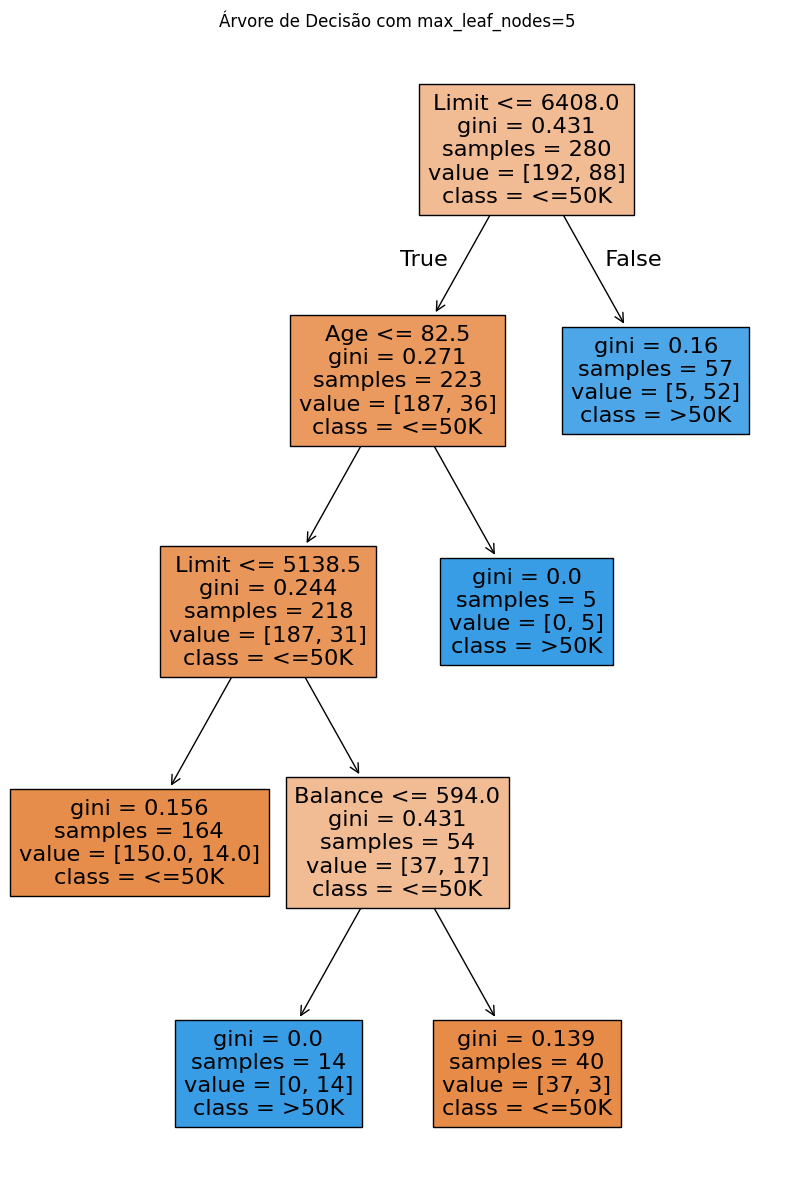

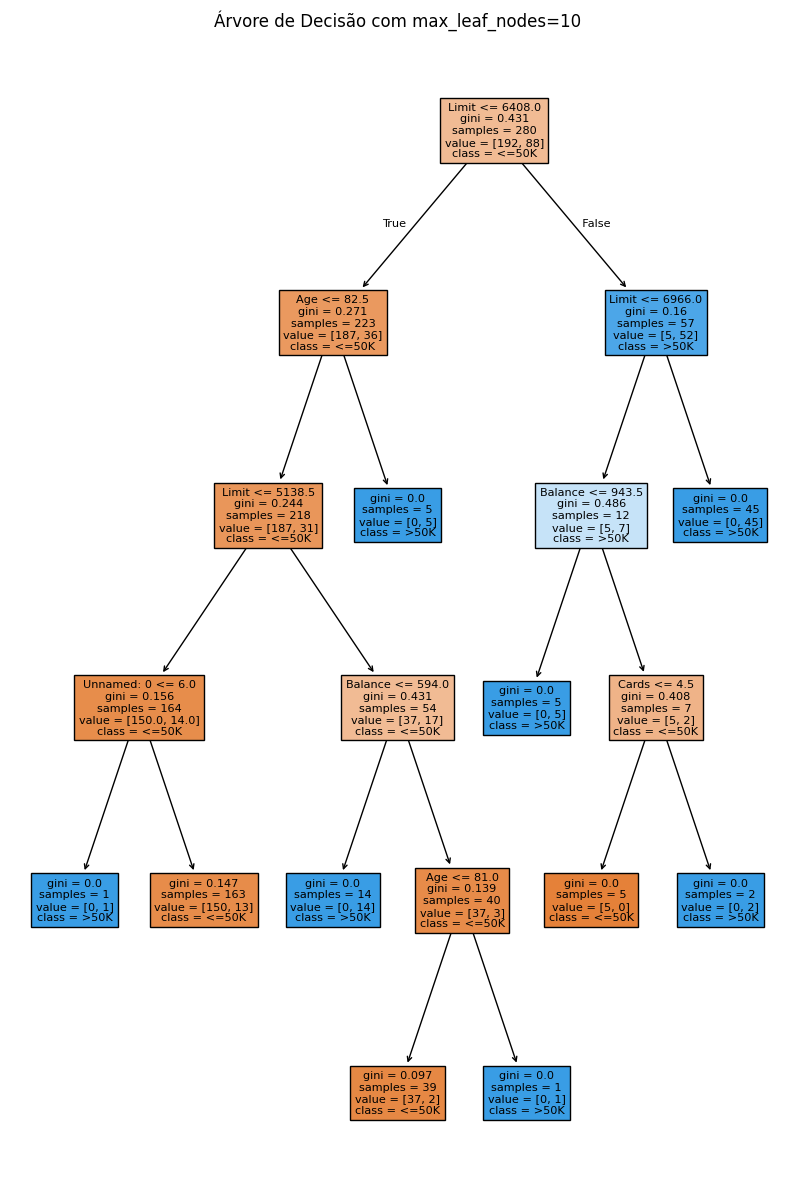

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from google.colab import drive

# Conectar com Google Drive
drive.mount('/content/drive', force_remount=True)

# Carregar os dados
df = pd.read_csv('/content/drive/MyDrive/Credit.csv')

# Exibir as primeiras linhas do dataset
print(df.head())
print("\n")

# Transformar a coluna 'Income' em um target binário (mais de 50k = 1, menos de 50k = 0)
df['Income'] = (df['Income'] > 50).astype(int)

# Converter colunas categóricas para numéricas
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separar features e target
X = df.drop(columns=['Income'])
y = df['Income']



# Passo2
# Dividir dados em treino e teste (70% treino 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar e avaliar os modelos
def evaluate_models(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = accuracy_score(y_test, y_pred_knn)

    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    acc_tree = accuracy_score(y_test, y_pred_tree)

    print(f'Acurácia KNN: {acc_knn:.4f}')
    print(f'Acurácia Árvore de Decisão: {acc_tree:.4f}')

# Avaliação sem normalização/padronização
print("Resultados sem normalização/padronização:")
evaluate_models(X_train, X_test, y_train, y_test)



# Passo 3
# Normalização (MinMaxScaler)
scaler_minmax = MinMaxScaler()
X_train_norm = scaler_minmax.fit_transform(X_train)
X_test_norm = scaler_minmax.transform(X_test)

print("\nResultados com Normalização:")
evaluate_models(X_train_norm, X_test_norm, y_train, y_test)



# Passo 4
# Padronização (StandardScaler)
scaler_standard = StandardScaler()
X_train_std = scaler_standard.fit_transform(X_train)
X_test_std = scaler_standard.transform(X_test)

print("\nResultados com Padronização:")
evaluate_models(X_train_std, X_test_std, y_train, y_test)



# Passo 5
# Testar diferentes valores de k para o KNN
k_values = range(1, 21)
accuracy_knn_values = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_knn_values.append(accuracy_score(y_test, y_pred_knn))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_knn_values, linestyle='-', color='plum', label='Acurácia')
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.title("Acurácia do KNN para Diferentes Valores de k")
plt.legend()
plt.show()



# Passo 6
# Testar diferentes valores de max_leaf_nodes na Árvore de Decisão
leaf_values = range(2, 21)
accuracy_tree_values = []

for leaf in leaf_values:
    tree = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    accuracy_tree_values.append(accuracy_score(y_test, y_pred_tree))

plt.figure(figsize=(8, 5))
plt.plot(leaf_values, accuracy_tree_values, linestyle='-', color='lightgreen', label='Acurácia')
plt.xlabel("Número Máximo de Folhas")
plt.ylabel("Acurácia")
plt.title("Acurácia da Árvore de Decisão para Diferentes max_leaf_nodes")
plt.legend()
plt.show()

# Exibir algumas árvores geradas
for leaf in [2, 5, 10]:
    tree = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    tree.fit(X_train, y_train)
    plt.figure(figsize=(10, 15))
    plot_tree(tree, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'])
    plt.title(f'Árvore de Decisão com max_leaf_nodes={leaf}')
    plt.show()

R: Foi usado Label Encoding para converter atributos categóricos em valores numéricos.

Justificativa:

- Eficiência: Simples e rápido para poucos valores distintos.

- Compatibilidade: Funciona bem com KNN e Árvore de Decisão.

- Evita aumento de dimensionalidade: Diferente do One-Hot Encoding, não cria muitas colunas extras.